# USA Housing Data Analysis
## Marshall Ferguson - 2/2022

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data

df_full = pd.read_csv('data\housing.csv')

df_full.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


The next few cells will give us a bit of an overview of the data.

In [3]:
df_full.shape

(384977, 22)

In [4]:
df_full.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [5]:
df_full.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Which columns will be of interest for our analysis?

In [6]:
df_full.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [7]:
vars_of_interest = ['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
                    'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long', 'state']

df_trimmed = df_full.filter(vars_of_interest)

df_trimmed.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,39.5357,-119.805,ca


Now that we have trimmed the data, let's export it to a new CSV file.

In [8]:
# Write trimmed DF to new CSV file

df_trimmed.to_csv('data\housing_trimmed.csv')

In [9]:
# Show contents of data directory to ensure CSV file was created

!dir "data/"

 Volume in drive C is Acer
 Volume Serial Number is E4EC-476E

 Directory of c:\Users\Marshall\Documents\projects\usa-housing-data-analysis\data

02/18/2022  02:52 PM    <DIR>          .
02/18/2022  02:52 PM    <DIR>          ..
02/14/2022  10:47 AM       558,438,401 housing.csv
03/03/2022  06:44 PM        25,346,817 housing_cleaned.csv
03/06/2022  06:10 PM        29,488,791 housing_trimmed.csv
               3 File(s)    613,274,009 bytes
               2 Dir(s)  348,806,225,920 bytes free


Let's explore this data to see if there are any outliers. To do this, we will first visualize the data with some histograms.

In [10]:
# sns.histplot(df_trimmed, x="price")

In [11]:
# sns.histplot(df_trimmed.price)

Both of the above cells took longer than 30 minutes and needed to be interrupted. Let's try some box plots instead.

<AxesSubplot:ylabel='price'>

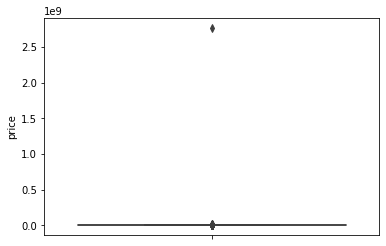

In [12]:
sns.boxplot(y=df_trimmed['price'])

It looks like we have an extreme outlier in the price column of our DF. Let's remove outliers from the DF, then try to make the box plots afterwards.

(As an aside, seaborn boxplots determine outliers as being data points outside of 1.5 IQRs of the lower and upper quartile, so we will find the interquartile range and then remove any data points outside 1.5 times said interquartile range.)

In [13]:
# Check shape of df_trimmed so we can see the # of rows before we remove outliers

df_trimmed.shape

(384977, 15)

In [14]:
# Use numpy to find the interquartile range of the price column

price_q3 = np.quantile(df_trimmed['price'], 0.75)
price_q1 = np.quantile(df_trimmed['price'], 0.25)
price_iqr = price_q3 - price_q1

price_iqr

590.0

In [15]:
# Create a list of values in df_trimmed.price that fall within our desired range

price_lower_range = price_q1 - (1.5*price_iqr)
price_upper_range = price_q3 + (1.5*price_iqr)

list_no_outliers = [x for x in df_trimmed['price'] if (
    (x > price_lower_range) & (x < price_upper_range))]

In [16]:
# Convert list_no_outliers to a series

price_no_outliers = pd.Series(list_no_outliers)

type(price_no_outliers)

pandas.core.series.Series

In [17]:
price_no_outliers.describe()

count    366146.000000
mean       1088.321588
std         400.013347
min           0.000000
25%         800.000000
50%        1009.000000
75%        1330.000000
max        2279.000000
dtype: float64

<AxesSubplot:>

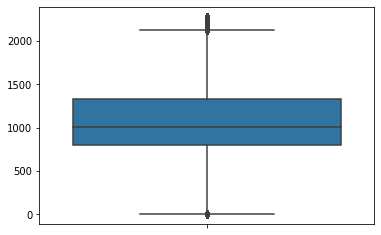

In [18]:
# Use seaborn to create a boxplot of price_no_outliers

sns.boxplot(y = price_no_outliers)

In [19]:
# Find amount of rows in price_no_outliers (we want a new df with this many rows)

price_no_outliers.shape

(366146,)

In [20]:
# Create a mask to filter out outliers, then check shape of new df to ensure it matches amount from above cell

price_outlier_mask = (df_trimmed.price > price_lower_range) & (df_trimmed.price < price_upper_range)

df_no_outliers = df_trimmed[price_outlier_mask]

df_no_outliers.shape

(366146, 15)

<AxesSubplot:xlabel='price', ylabel='Count'>

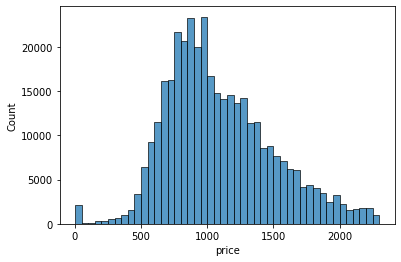

In [21]:
# Use seaborn to create a histogram of the price column

sns.histplot(df_no_outliers.price, binwidth=50)

Let's look at some of the other columns to see if they have any outliers as well.

In [22]:
df_no_outliers.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,366146.000000,3.661460e+05,366146.00000,366146.000000,366146.000000,366146.000000,366146.000000,366146.000000,366146.000000,366146.000000,364358.000000,364358.000000
mean,1088.321588,1.032821e+03,1.87307,1.456618,0.731755,0.711918,0.741650,0.077939,0.010089,0.044723,37.256095,-92.185788
std,400.013347,1.942050e+04,2.48601,0.576278,0.443047,0.452870,0.437728,0.268076,0.099936,0.206694,5.535107,15.984414
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,800.000000,7.500000e+02,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.422600,-98.168375
50%,1009.000000,9.330000e+02,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.662650,-87.521500
75%,1330.000000,1.125000e+03,2.00000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.196300,-81.235900
max,2279.000000,8.388607e+06,1000.00000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


It looks like the sqfeet column has some outliers. Let's check this out visually with a boxplot.

<AxesSubplot:ylabel='sqfeet'>

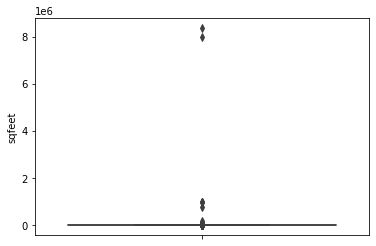

In [23]:
# Use seaborn to create a boxplot of the sqfeet column

sns.boxplot(y=df_no_outliers.sqfeet)

Those data points at the top are likely errors, similar to the price column. Let's remove them the same way.

In [24]:
# Use numpy to find the interquartile range of the sqfeet column

sqfeet_q3 = np.quantile(df_no_outliers['sqfeet'], 0.75)
sqfeet_q1 = np.quantile(df_no_outliers['sqfeet'], 0.25)
sqfeet_iqr = sqfeet_q3 - sqfeet_q1

sqfeet_iqr

375.0

In [25]:
# Determine the upper and lower ranges of sqfeet column

sqfeet_lower_range = sqfeet_q1 - (1.5 * sqfeet_iqr)
sqfeet_upper_range = sqfeet_q3 + (1.5 * sqfeet_iqr)

print(sqfeet_lower_range, sqfeet_upper_range)

187.5 1687.5


In [26]:
# Check the shape of the DF before altering

df_no_outliers.shape

(366146, 15)

In [27]:
# Use another mask to get rid of outlier, then check shape of DF to ensure outliers were removed

sqfeet_outlier_mask = (df_no_outliers.sqfeet > sqfeet_lower_range) & (df_no_outliers.sqfeet < sqfeet_upper_range)

df_no_outliers = df_no_outliers[sqfeet_outlier_mask]

df_no_outliers.shape

(351700, 15)

Now that the outliers have been removed from the sqfeet column, let's look at the resulting boxplot.

<AxesSubplot:ylabel='sqfeet'>

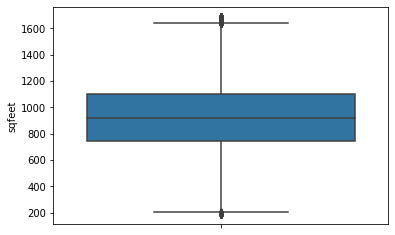

In [28]:
# Use seaborn to create a boxplot of sqfeet column after removing outliers

sns.boxplot(y=df_no_outliers.sqfeet)

That looks much better. Now let's see the histogram for sqfeet.

<AxesSubplot:xlabel='sqfeet', ylabel='Count'>

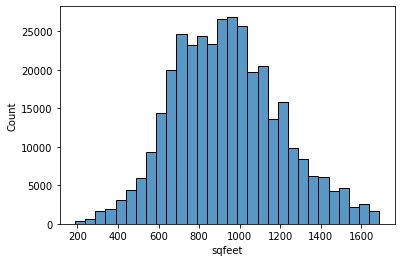

In [29]:
# Use seaborn to create a histogram of sqfeet column after removing outliers

sns.histplot(df_no_outliers.sqfeet, binwidth=50)

Let's look for any more outliers in the dataset.

In [30]:
df_no_outliers.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,351700.000000,350169.000000,350169.000000
mean,1078.627990,932.386181,1.811857,1.427306,0.739286,0.717498,0.745775,0.078368,0.009855,0.042403,37.216569,-92.192929
std,391.311601,264.418784,1.864169,0.544647,0.439025,0.450217,0.435425,0.268750,0.098782,0.201506,5.519167,15.994233
min,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,799.000000,742.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.395200,-98.193900
50%,1000.000000,920.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.548400,-87.521400
75%,1311.000000,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.141000,-81.252000
max,2279.000000,1687.000000,1000.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


It looks as though the beds and baths columns both have outliers too. I highly doubt there are any homes in this dataset with 1000 bedrooms or 25 bathrooms! Let's check this out with some more charts.

<AxesSubplot:ylabel='beds'>

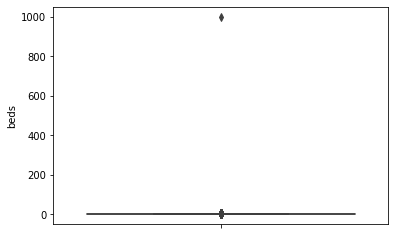

In [31]:
# Use seaborn to create a boxplot of the beds column

sns.boxplot(y=df_no_outliers.beds)

<AxesSubplot:ylabel='baths'>

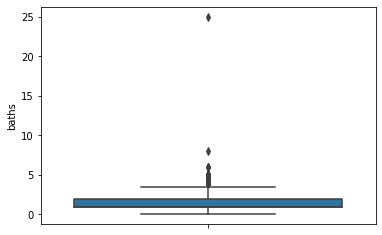

In [32]:
# Use seaborn to create a boxplot of the baths column

sns.boxplot(y=df_no_outliers.baths)

Let's use more masking to remove the outliers from both the beds and baths columns.

In [33]:
# Use numpy to find the interquartile range of the beds column

beds_q3 = np.quantile(df_no_outliers['beds'], 0.75)
beds_q1 = np.quantile(df_no_outliers['beds'], 0.25)
beds_iqr = beds_q3 - beds_q1

beds_iqr

1.0

In [34]:
# Determine the upper and lower ranges of beds column

beds_lower_range = beds_q1 - (1.5 * beds_iqr)
beds_upper_range = beds_q3 + (1.5 * beds_iqr)

print(beds_lower_range, beds_upper_range)

-0.5 3.5


We can up with a negative number for the lower range, but since a house cannot have negative bedrooms and the min for beds is 0, this should not cause any problems.

In [35]:
# Check shape of DF before removing outliers

df_no_outliers.shape

(351700, 15)

In [36]:
# Remove outliers with mask then check shape of DF to ensure we have fewer rows

beds_outlier_mask = (df_no_outliers.beds > beds_lower_range) & (df_no_outliers.beds < beds_upper_range)

df_no_outliers = df_no_outliers[beds_outlier_mask]

df_no_outliers.shape

(345745, 15)

In [37]:
# Use numpy to find the interquartile range of the baths column

baths_q3 = np.quantile(df_no_outliers['baths'], 0.75)
baths_q1 = np.quantile(df_no_outliers['baths'], 0.25)
baths_iqr = beds_q3 - beds_q1

baths_iqr

1.0

In [38]:
# Determine upper and lower ranges of baths column

baths_lower_range = baths_q1 - (1.5 * baths_iqr)
baths_upper_range = baths_q3 + (1.5 * baths_iqr)

print(baths_lower_range, baths_upper_range)

-0.5 3.5


We got negative number for the lower limit again, but this still should not be a problem for the same reasons.

In [39]:
# Check shape of DF before altering

df_no_outliers.shape

(345745, 15)

In [40]:
# Remove outliers with mask then check shape of DF to ensure we have fewer rows

baths_outlier_mask = (df_no_outliers.baths > baths_lower_range) & (df_no_outliers.baths < beds_upper_range)

df_no_outliers = df_no_outliers[baths_outlier_mask]

df_no_outliers.shape

(345615, 15)

Now that we have removed the outliers from both the beds and baths columns, let's look at the boxplots again as well as the histograms.

<AxesSubplot:ylabel='beds'>

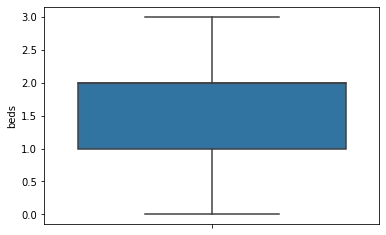

In [41]:
# Use seaborn to create a boxplot of the beds column

sns.boxplot(y=df_no_outliers.beds)

<AxesSubplot:xlabel='beds', ylabel='Count'>

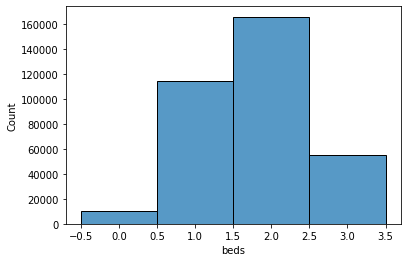

In [42]:
# Use seaborn to create a histogram of the beds column

sns.histplot(df_no_outliers.beds, discrete=True)

<AxesSubplot:ylabel='baths'>

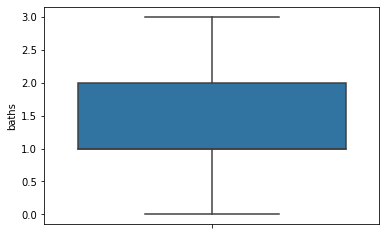

In [43]:
# Use seaborn to create a boxplot of the baths column

sns.boxplot(y=df_no_outliers.baths)

<AxesSubplot:xlabel='baths', ylabel='Count'>

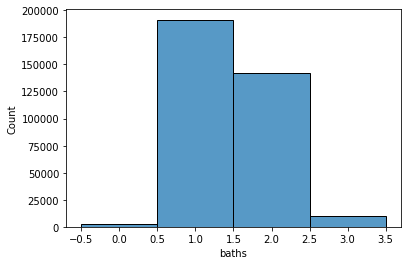

In [44]:
# Use seaborn to create a histogram of the baths column

sns.histplot(df_no_outliers.baths, discrete=True)

Let's ensure that we have removed the outliers from all columns.

In [45]:
df_no_outliers.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,345615.000000,344147.000000,344147.000000
mean,1079.522767,924.854873,1.769281,1.411157,0.740981,0.718667,0.745888,0.077609,0.009866,0.039738,37.214009,-92.204069
std,389.843593,259.078384,0.747876,0.519727,0.438097,0.449650,0.435362,0.267556,0.098839,0.195343,5.515996,16.019573
min,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,799.000000,738.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.418800,-98.235900
50%,1000.000000,912.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.540200,-87.533400
75%,1311.000000,1098.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.137900,-81.252000
max,2279.000000,1687.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


It looks like some of the columns that need values have entries of 0, specifically price, beds, and baths. Let's remove these rows.

Let's make sure each house has a price of at least 10.

In [46]:
# Check size of df_no_outliers before changing anything

df_no_outliers.shape

(345615, 15)

In [47]:
# Remove rows with a price less than 10 with a boolean mask

df_no_outliers = df_no_outliers[df_no_outliers['price'] > 10]

df_no_outliers.shape

(343736, 15)

Let's see if removing those rows also removed the houses with 0 beds or baths.

In [48]:
df_no_outliers.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,343736.000000,343736.000000,343736.000000,343736.000000,343736.000000,343736.00000,343736.000000,343736.000000,343736.000000,343736.000000,342274.000000,342274.000000
mean,1085.421832,924.870878,1.769151,1.411282,0.741595,0.71918,0.745790,0.077519,0.009906,0.039478,37.216995,-92.186244
std,382.632997,259.039066,0.747801,0.519566,0.437758,0.44940,0.435417,0.267413,0.099034,0.194729,5.517664,16.016962
min,11.000000,188.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,800.000000,738.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.422200,-98.181850
50%,1000.000000,912.000000,2.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,37.564200,-87.506200
75%,1315.000000,1098.000000,2.000000,2.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,41.137900,-81.252000
max,2279.000000,1687.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


It did not. Let's do that now.

In [49]:
# Check size of df_no_outliers before changing anything

df_no_outliers.shape

(343736, 15)

In [50]:
# Remove rows with beds or baths less than 1 with a boolean mask

df_no_outliers = df_no_outliers[df_no_outliers['baths'] > 0]
df_no_outliers = df_no_outliers[df_no_outliers['beds'] > 0]

df_no_outliers.shape

(330339, 15)

Let's make sure that got rid of all the rows with either a price, beds, and baths of 0.

In [51]:
df_no_outliers.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,330339.000000,328943.000000,328943.000000
mean,1089.773142,939.484820,1.825840,1.436334,0.740448,0.718986,0.748691,0.074829,0.009590,0.035996,37.197773,-92.023171
std,380.575103,248.354991,0.688749,0.507451,0.438389,0.449495,0.433766,0.263116,0.097459,0.186281,5.513442,15.935804
min,11.000000,188.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,800.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.378700,-97.940400
50%,1009.000000,925.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.522000,-87.267100
75%,1320.000000,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.137700,-81.227700
max,2279.000000,1687.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


Now that we have trimmed *and* cleaned the data, let's export it to another CSV file.

In [52]:
# Write trimmed/cleaned DF to new CSV file

df_no_outliers.to_csv('data\housing_cleaned.csv')

In [53]:
# Show contents of data directory to ensure CSV file was created

!dir "data/"

 Volume in drive C is Acer
 Volume Serial Number is E4EC-476E

 Directory of c:\Users\Marshall\Documents\projects\usa-housing-data-analysis\data

02/18/2022  02:52 PM    <DIR>          .
02/18/2022  02:52 PM    <DIR>          ..
02/14/2022  10:47 AM       558,438,401 housing.csv
03/06/2022  06:10 PM        25,346,817 housing_cleaned.csv
03/06/2022  06:10 PM        29,488,791 housing_trimmed.csv
               3 File(s)    613,274,009 bytes
               2 Dir(s)  348,811,014,144 bytes free


Let's create a correaltion matrix to see which columns have the most impact on a housing unit's price.

In [54]:
corr = df_no_outliers.corr()

corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.315494,0.146304,0.246700,0.017897,0.012789,-0.135733,0.064247,0.082165,-0.018132,0.062557,-0.157453
sqfeet,0.315494,1.000000,0.747947,0.672810,-0.021509,0.008581,-0.013871,-0.009753,-0.002122,-0.044711,0.010536,0.106300
beds,0.146304,0.747947,1.000000,0.627829,-0.035035,-0.008755,0.001375,-0.028330,-0.015931,-0.017603,0.044895,0.028905
baths,0.246700,0.672810,0.627829,1.000000,0.029627,0.061187,0.009216,0.017090,0.000349,-0.002624,-0.096138,0.018510
cats_allowed,0.017897,-0.021509,-0.035035,0.029627,1.000000,0.893024,0.003467,0.115051,0.041609,-0.053849,-0.016355,0.026327
dogs_allowed,0.012789,0.008581,-0.008755,0.061187,0.893024,1.000000,0.005590,0.120976,0.042585,-0.036170,-0.061743,0.013246
smoking_allowed,-0.135733,-0.013871,0.001375,0.009216,0.003467,0.005590,1.000000,-0.208184,-0.074462,-0.144488,-0.188974,0.151898
wheelchair_access,0.064247,-0.009753,-0.028330,0.017090,0.115051,0.120976,-0.208184,1.000000,0.161252,0.175542,-0.003533,-0.016826
electric_vehicle_charge,0.082165,-0.002122,-0.015931,0.000349,0.041609,0.042585,-0.074462,0.161252,1.000000,0.083866,0.033292,-0.034996
comes_furnished,-0.018132,-0.044711,-0.017603,-0.002624,-0.053849,-0.036170,-0.144488,0.175542,0.083866,1.000000,0.011421,-0.010881


Let's filter out the lat and long columns.

In [55]:
corr = df_no_outliers.drop(['lat', 'long'], axis=1).corr()

corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.315494,0.146304,0.246700,0.017897,0.012789,-0.135733,0.064247,0.082165,-0.018132
sqfeet,0.315494,1.000000,0.747947,0.672810,-0.021509,0.008581,-0.013871,-0.009753,-0.002122,-0.044711
beds,0.146304,0.747947,1.000000,0.627829,-0.035035,-0.008755,0.001375,-0.028330,-0.015931,-0.017603
baths,0.246700,0.672810,0.627829,1.000000,0.029627,0.061187,0.009216,0.017090,0.000349,-0.002624
cats_allowed,0.017897,-0.021509,-0.035035,0.029627,1.000000,0.893024,0.003467,0.115051,0.041609,-0.053849
dogs_allowed,0.012789,0.008581,-0.008755,0.061187,0.893024,1.000000,0.005590,0.120976,0.042585,-0.036170
smoking_allowed,-0.135733,-0.013871,0.001375,0.009216,0.003467,0.005590,1.000000,-0.208184,-0.074462,-0.144488
wheelchair_access,0.064247,-0.009753,-0.028330,0.017090,0.115051,0.120976,-0.208184,1.000000,0.161252,0.175542
electric_vehicle_charge,0.082165,-0.002122,-0.015931,0.000349,0.041609,0.042585,-0.074462,0.161252,1.000000,0.083866
comes_furnished,-0.018132,-0.044711,-0.017603,-0.002624,-0.053849,-0.036170,-0.144488,0.175542,0.083866,1.000000


It looks like sqfeet has the most impact on price, followed by baths and then beds. Let's visualize this with a heatmap.

<AxesSubplot:>

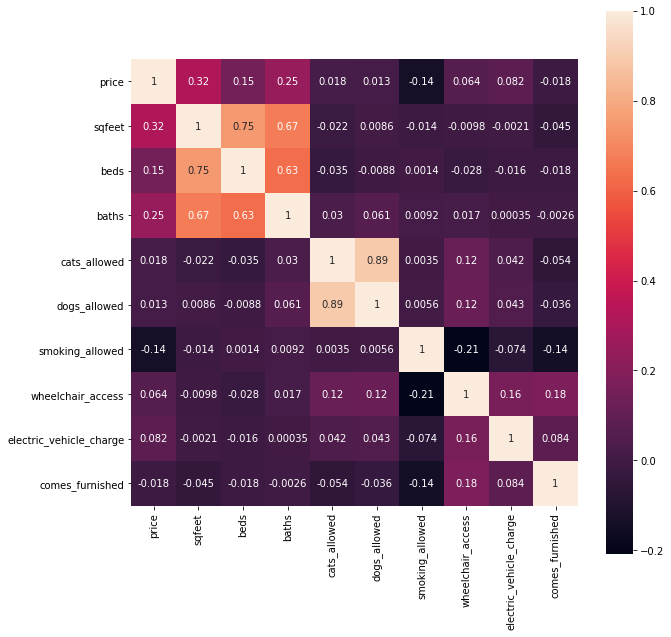

In [56]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(corr, ax=ax, annot=True, square=True)

Let's try to pull out just the housing units from Louisville, KY and analyze that data.

In [57]:
df_louisville = df_no_outliers[df_no_outliers['region'] == 'louisville']

df_louisville.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
105257,louisville,1269,apartment,1340,3,2.5,1,1,1,0,0,0,38.2719,-85.6093,ky
105271,louisville,769,apartment,600,1,1.0,1,1,1,0,0,0,38.3045,-85.5362,ky
105319,louisville,1199,apartment,1285,2,2.0,0,0,1,0,0,0,38.2278,-85.4884,ky
105349,louisville,630,apartment,650,1,1.0,0,0,1,0,0,1,38.2172,-85.7648,ky
105515,louisville,1600,house,1400,3,2.0,0,1,0,0,0,0,38.2628,-85.6663,ky


Let's make sure we only got Louisville, KY and not a Louisville from any other states.

In [58]:
df_louisville.shape

(1715, 15)

In [59]:
df_louisville.state.value_counts()

ky    1715
Name: state, dtype: int64

Good, it looks like we have 1804 rows of data all from Louisville, KY and no other Louisvilles in any other states.

In [60]:
df_louisville.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1705.000000,1705.000000
mean,887.834985,930.791837,1.819242,1.334402,0.820408,0.815743,0.922449,0.025656,0.006414,0.017493,38.199792,-85.674123
std,200.441599,223.481507,0.631701,0.471145,0.383959,0.387806,0.267542,0.158153,0.079853,0.131136,0.212659,0.179681
min,100.000000,250.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.394900,-86.854400
25%,765.000000,770.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.174600,-85.747600
50%,850.000000,900.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.205100,-85.678700
75%,999.000000,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.253500,-85.609800
max,2095.000000,1683.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.205500,-80.193300


In [61]:
lou_corr = df_louisville.drop(['lat', 'long'], axis=1).corr()

lou_corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.543351,0.271023,0.465827,0.068327,0.084587,-0.124254,0.139161,-0.044185,0.018355
sqfeet,0.543351,1.000000,0.626638,0.672822,-0.153175,-0.114406,0.009537,0.039521,0.057745,-0.020182
beds,0.271023,0.626638,1.000000,0.481577,-0.184433,-0.152705,0.034380,0.017247,0.069261,-0.039280
baths,0.465827,0.672822,0.481577,1.000000,-0.087092,-0.064913,0.029972,0.072711,0.020494,0.009140
cats_allowed,0.068327,-0.153175,-0.184433,-0.087092,1.000000,0.906085,0.114240,0.047098,0.037592,-0.053443
dogs_allowed,0.084587,-0.114406,-0.152705,-0.064913,0.906085,1.000000,0.143357,0.048583,0.038185,-0.039835
smoking_allowed,-0.124254,0.009537,0.034380,0.029972,0.114240,0.143357,1.000000,-0.049470,-0.031322,-0.277268
wheelchair_access,0.139161,0.039521,0.017247,0.072711,0.047098,0.048583,-0.049470,1.000000,0.310345,0.231529
electric_vehicle_charge,-0.044185,0.057745,0.069261,0.020494,0.037592,0.038185,-0.031322,0.310345,1.000000,0.323570
comes_furnished,0.018355,-0.020182,-0.039280,0.009140,-0.053443,-0.039835,-0.277268,0.231529,0.323570,1.000000


<AxesSubplot:>

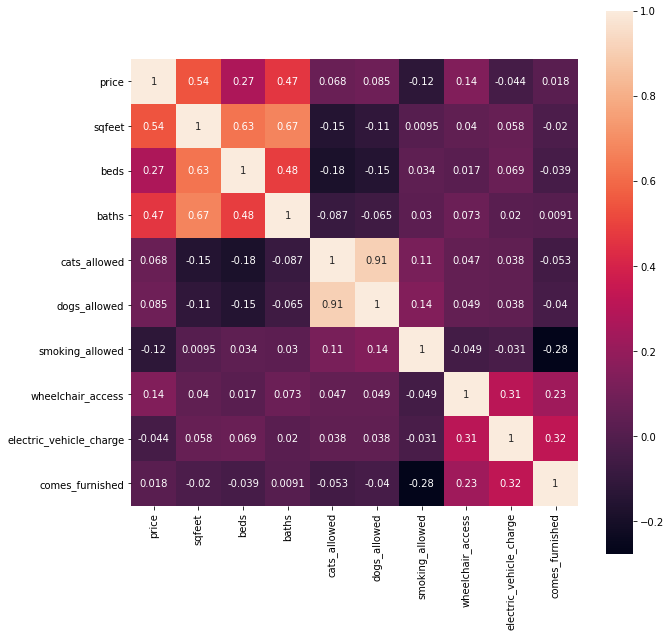

In [62]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(lou_corr, ax=ax, annot=True, square=True)

The correlations between sqfeet, baths, and beds to price are higher in Louisville, KY than in the USA as a whole, but still in the same order.

Let's look for some cities comparable to Louisville, KY. We want cities that are close in geography and have a similar population. For the sake of comparison, Louisville had a population of 617,790 in 2019 according to Google. Let's look at the populations for Nashville, Cincinnati, St. Louis, and Indianapolis to begin with.

| City | Population (2019) |
| ----- | ----- |
| Louisville, KY | 617,790 |
| Nashville, TN | 629,587 |
| Cincinnati, OH | 301,394 |
| St. Louis, MO | 308,174 |
| Indianapolis, IN | 864,447 |

Source: Google

Let's make sure these cities are in our dataset before continuing.

In [63]:
df_no_outliers[df_no_outliers['region'] == 'nashville']

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
276353,nashville,1265,apartment,1310,2,1.5,1,1,0,0,0,0,36.0734,-86.9407,tn
276360,nashville,2195,condo,618,1,1.0,1,1,0,0,0,1,36.1619,-86.7826,tn
276508,nashville,1549,townhouse,1522,3,2.5,1,1,0,0,0,0,36.1991,-86.5231,tn
276632,nashville,610,house,750,3,1.0,0,0,1,0,0,0,36.1657,-86.7781,tn
276681,nashville,2250,apartment,922,2,1.0,0,1,1,0,0,0,36.1337,-86.7888,tn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283819,nashville,1399,apartment,1335,3,2.0,1,1,0,0,0,0,35.7895,-86.3730,tn
283820,nashville,1259,apartment,1108,2,2.0,1,1,0,0,0,0,35.7895,-86.3730,tn
283821,nashville,1259,apartment,1108,2,2.0,1,1,0,0,0,0,35.7895,-86.3730,tn
283822,nashville,912,apartment,700,1,1.0,1,1,1,0,0,0,35.8390,-86.3494,tn


We have 2326 rows of data for housing in Nashville.

In [64]:
df_no_outliers[df_no_outliers['region'] == 'cincinnati']

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
218910,cincinnati,865,apartment,954,2,1.5,1,1,1,0,0,0,39.0300,-84.5590,oh
218969,cincinnati,672,apartment,750,1,1.0,1,1,1,0,0,0,38.9941,-84.6420,oh
218983,cincinnati,835,apartment,830,2,1.0,1,1,1,0,0,0,39.3402,-84.3998,oh
219052,cincinnati,1290,apartment,1500,3,2.0,1,1,1,0,0,0,38.9099,-84.6333,oh
219620,cincinnati,946,apartment,900,1,1.5,1,1,1,0,0,0,39.2839,-84.4744,oh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226401,cincinnati,810,apartment,676,1,1.0,1,1,1,1,0,0,39.3079,-84.4931,oh
226402,cincinnati,925,apartment,790,1,1.0,1,1,1,1,0,0,39.3079,-84.4931,oh
226403,cincinnati,750,apartment,600,1,1.0,1,0,0,0,0,0,39.1443,-84.4445,oh
226404,cincinnati,999,apartment,1000,2,2.0,1,1,1,1,0,0,39.3079,-84.4931,oh


It looks like we have 1999 rows of data for housing in Cincinnati.

In [65]:
df_no_outliers[df_no_outliers['region'] == 'st louis']

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
173382,st louis,1600,apartment,1650,2,2.0,1,1,0,0,0,0,38.6332,-90.2164,mo
173383,st louis,760,apartment,715,1,1.0,1,1,0,0,0,0,38.5998,-90.2173,mo
173384,st louis,750,house,1000,2,1.0,0,0,1,0,0,0,38.9436,-90.0714,mo
173385,st louis,1000,apartment,917,1,1.0,1,1,0,1,0,0,38.6332,-90.2164,mo
173386,st louis,1100,apartment,1017,1,1.0,1,1,0,1,0,0,38.6332,-90.2164,mo
173387,st louis,1345,apartment,935,2,1.0,1,1,0,0,0,0,38.6753,-90.4406,mo
173388,st louis,1007,apartment,986,2,2.0,1,1,1,0,0,0,38.8014,-90.5065,mo
173389,st louis,625,apartment,662,1,1.0,1,1,1,0,0,0,38.8131,-90.2983,mo
173390,st louis,800,apartment,670,1,1.0,1,1,1,0,0,0,38.7622,-90.5471,mo


We only have 9 rows of data for housing in St. Louis, which is not enough to have a thorough analysis. Let's exclude St. Louis then.

In [66]:
df_no_outliers[df_no_outliers['region'] == 'indianapolis']

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
84614,indianapolis,635,apartment,771,1,1.0,0,0,1,0,0,0,39.6808,-86.1446,in
84661,indianapolis,669,apartment,1000,2,1.5,1,1,1,0,0,0,39.8471,-85.9741,in
84663,indianapolis,865,apartment,1008,2,1.5,1,1,1,0,0,0,39.2094,-85.8940,in
84665,indianapolis,649,apartment,910,2,1.5,0,0,1,0,0,0,39.7940,-86.2707,in
84675,indianapolis,550,house,635,2,1.0,1,1,1,0,0,0,39.7750,-86.1093,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101557,indianapolis,935,apartment,1016,2,2.0,1,1,1,0,0,0,39.7265,-86.0005,in
101558,indianapolis,634,apartment,700,1,1.0,1,1,1,0,0,0,39.8221,-86.2199,in
101559,indianapolis,785,apartment,773,1,1.0,1,1,1,0,0,0,39.7265,-86.0005,in
101560,indianapolis,935,apartment,912,2,1.5,1,1,1,0,0,0,39.2094,-85.8940,in


We have 2039 rows of data for housing in Indianapolis.

In [67]:
df_no_outliers[df_no_outliers['region'] == 'lexington']

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
105020,lexington,629,apartment,790,1,1.0,1,1,1,0,0,0,37.9767,-84.5104,ky
105054,lexington,809,apartment,900,2,2.0,1,1,1,0,0,0,37.9849,-84.4816,ky
105143,lexington,959,apartment,1112,2,2.0,1,1,1,0,0,0,37.9645,-84.4839,ky
106057,lexington,998,apartment,1069,2,2.0,1,1,1,0,0,0,38.0102,-84.4274,ky
108923,lexington,975,house,1262,3,2.0,1,1,0,0,0,0,38.0474,-84.4843,ky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122089,lexington,779,apartment,875,2,1.0,1,1,1,0,0,0,37.9742,-84.4964,ky
122090,lexington,779,apartment,875,2,1.0,1,1,1,0,0,0,37.9742,-84.4964,ky
122091,lexington,699,apartment,708,1,1.0,1,1,1,0,0,0,37.9742,-84.4964,ky
122092,lexington,819,apartment,745,1,1.0,1,1,1,0,0,0,38.0102,-84.4274,ky


There are 2158 rows for Lexington, KY and the city had a population of 320,601 in 2019. Let's use this city instead of St. Louis.

Let's create DataFrames for each of these cities.

In [68]:
# Create DFs for each city, print shape of each DF to ensure correct size

df_nashville = df_no_outliers[df_no_outliers['region'] == 'nashville']
df_cincinnati = df_no_outliers[df_no_outliers['region'] == 'cincinnati']
df_indianapolis = df_no_outliers[df_no_outliers['region'] == 'indianapolis']
df_lexington = df_no_outliers[df_no_outliers['region'] == 'lexington']

print(df_nashville.shape, df_cincinnati.shape, df_indianapolis.shape, df_lexington.shape)

(2239, 15) (1928, 15) (1977, 15) (2113, 15)


Similar to Louisville, let's ensure we got the cities in only the appropriate state

In [69]:
print(df_nashville.state.value_counts())
print(df_cincinnati.state.value_counts())
print(df_indianapolis.state.value_counts())
print(df_lexington.state.value_counts())

tn    2239
Name: state, dtype: int64
oh    1928
Name: state, dtype: int64
in    1977
Name: state, dtype: int64
ky    2113
Name: state, dtype: int64


Let's create heatmaps to explore the relationships in the data for each city.

In [70]:
# Create correlation matrix for Nashville DF

nash_corr = df_nashville.drop(['lat', 'long'], axis=1).corr()

nash_corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.468857,0.336610,0.393761,0.026520,0.064746,-0.306847,0.191385,0.127600,0.122931
sqfeet,0.468857,1.000000,0.808246,0.787559,-0.104178,-0.073854,-0.094560,-0.019082,-0.062721,-0.034610
beds,0.336610,0.808246,1.000000,0.771603,-0.131397,-0.106043,-0.074561,-0.062014,-0.069174,-0.053639
baths,0.393761,0.787559,0.771603,1.000000,-0.126489,-0.108436,-0.082609,-0.022245,-0.051772,-0.074301
cats_allowed,0.026520,-0.104178,-0.131397,-0.126489,1.000000,0.944804,-0.032867,0.098848,0.062392,-0.051996
dogs_allowed,0.064746,-0.073854,-0.106043,-0.108436,0.944804,1.000000,-0.059971,0.102467,0.062027,-0.045389
smoking_allowed,-0.306847,-0.094560,-0.074561,-0.082609,-0.032867,-0.059971,1.000000,-0.273499,-0.197543,-0.127104
wheelchair_access,0.191385,-0.019082,-0.062014,-0.022245,0.098848,0.102467,-0.273499,1.000000,0.389917,0.197889
electric_vehicle_charge,0.127600,-0.062721,-0.069174,-0.051772,0.062392,0.062027,-0.197543,0.389917,1.000000,0.109011
comes_furnished,0.122931,-0.034610,-0.053639,-0.074301,-0.051996,-0.045389,-0.127104,0.197889,0.109011,1.000000


<AxesSubplot:>

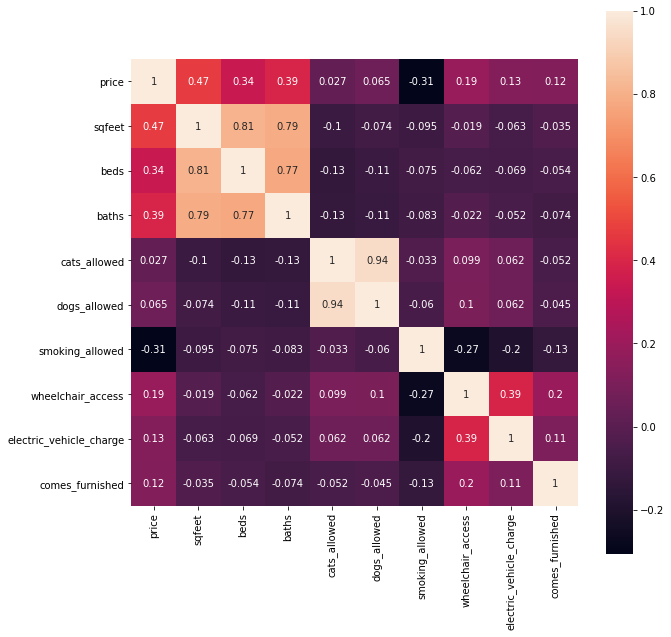

In [71]:
# Create a heatmap for Nashville correlation matrix

fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(nash_corr, ax=ax, annot=True, square=True)

In [72]:
# Create correlation matrix for Cincinnati data

cin_corr = df_cincinnati.drop(['lat', 'long'], axis=1).corr()

cin_corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.502362,0.313926,0.415777,0.107612,0.060601,-0.293086,0.287684,0.011437,0.019310
sqfeet,0.502362,1.000000,0.759496,0.669968,-0.015060,0.056801,-0.111099,0.150574,0.020264,0.047252
beds,0.313926,0.759496,1.000000,0.607608,-0.035902,0.013929,-0.034124,0.063408,0.003020,0.006982
baths,0.415777,0.669968,0.607608,1.000000,0.053349,0.095679,0.017375,0.168494,0.001168,-0.031564
cats_allowed,0.107612,-0.015060,-0.035902,0.053349,1.000000,0.882801,0.087400,0.148133,-0.004100,0.011632
dogs_allowed,0.060601,0.056801,0.013929,0.095679,0.882801,1.000000,0.142020,0.149779,-0.002542,0.016580
smoking_allowed,-0.293086,-0.111099,-0.034124,0.017375,0.087400,0.142020,1.000000,-0.175766,-0.045376,-0.221150
wheelchair_access,0.287684,0.150574,0.063408,0.168494,0.148133,0.149779,-0.175766,1.000000,0.070958,0.037938
electric_vehicle_charge,0.011437,0.020264,0.003020,0.001168,-0.004100,-0.002542,-0.045376,0.070958,1.000000,0.137495
comes_furnished,0.019310,0.047252,0.006982,-0.031564,0.011632,0.016580,-0.221150,0.037938,0.137495,1.000000


<AxesSubplot:>

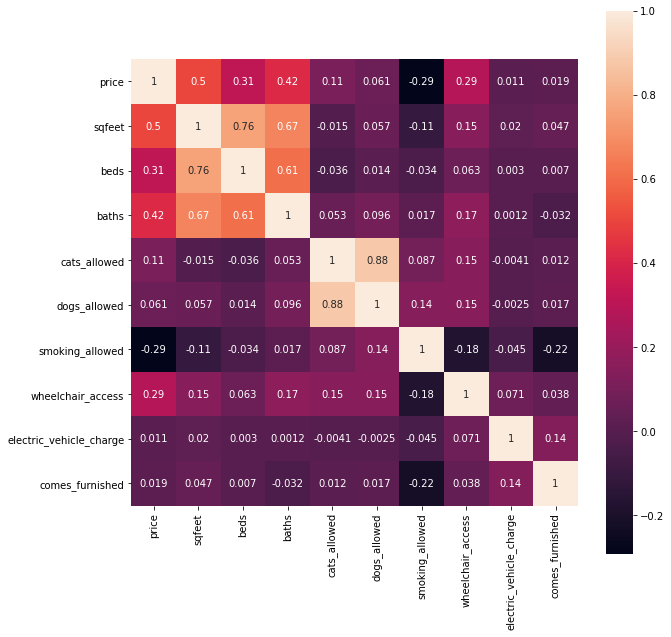

In [73]:
# Create a heatmap for Cincinnati correlation matrix

fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(cin_corr, ax=ax, annot=True, square=True)

In [74]:
# Create correlation matrix for Indianapolis data

ind_corr = df_indianapolis.drop(['lat', 'long'], axis=1).corr()

ind_corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.540408,0.342881,0.518739,0.150336,0.141625,-0.287423,0.122420,0.027032,0.061214
sqfeet,0.540408,1.000000,0.770230,0.634063,0.141304,0.144356,-0.035615,0.043636,0.032934,0.034329
beds,0.342881,0.770230,1.000000,0.571520,0.004911,0.019290,0.015553,0.044385,0.052964,0.011107
baths,0.518739,0.634063,0.571520,1.000000,0.067767,0.078091,-0.016831,0.110340,0.019298,0.039252
cats_allowed,0.150336,0.141304,0.004911,0.067767,1.000000,0.962174,0.057389,0.116024,0.046576,-0.033616
dogs_allowed,0.141625,0.144356,0.019290,0.078091,0.962174,1.000000,0.073502,0.117287,0.047083,-0.031870
smoking_allowed,-0.287423,-0.035615,0.015553,-0.016831,0.057389,0.073502,1.000000,-0.176209,0.006048,-0.141703
wheelchair_access,0.122420,0.043636,0.044385,0.110340,0.116024,0.117287,-0.176209,1.000000,0.240696,0.109505
electric_vehicle_charge,0.027032,0.032934,0.052964,0.019298,0.046576,0.047083,0.006048,0.240696,1.000000,0.139948
comes_furnished,0.061214,0.034329,0.011107,0.039252,-0.033616,-0.031870,-0.141703,0.109505,0.139948,1.000000


<AxesSubplot:>

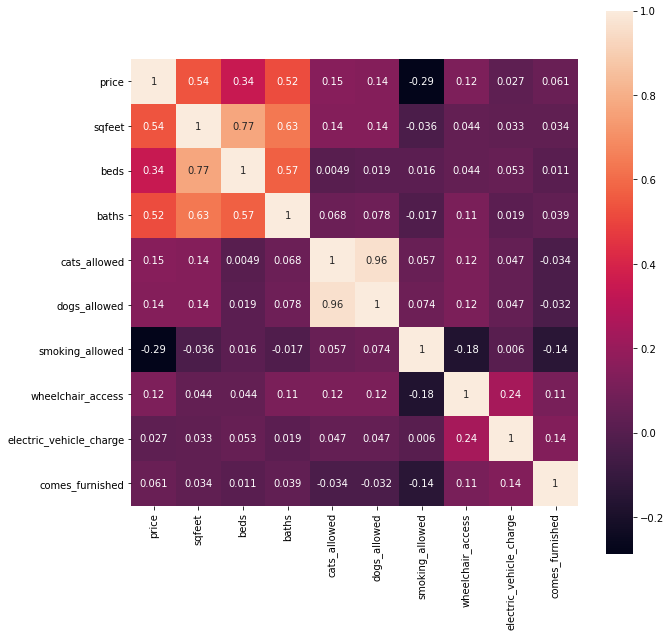

In [75]:
# Create heatmap for Indianapolis correaltion matrix

fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(ind_corr, ax=ax, annot=True, square=True)

In [76]:
# Create correlation matrix for Lexington data

lex_corr = df_lexington.drop(['lat', 'long'], axis=1).corr()

lex_corr

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.568092,0.448644,0.489968,-0.091804,-0.113862,-0.056152,-0.010136,-0.000926,0.116748
sqfeet,0.568092,1.000000,0.772806,0.630925,-0.155616,-0.144843,-0.097059,0.091975,0.107227,0.166455
beds,0.448644,0.772806,1.000000,0.567612,-0.118128,-0.103090,-0.007183,0.088319,0.058187,0.079283
baths,0.489968,0.630925,0.567612,1.000000,-0.135606,-0.134130,-0.145772,0.051013,0.048359,0.080924
cats_allowed,-0.091804,-0.155616,-0.118128,-0.135606,1.000000,0.919052,0.035101,0.019833,0.018363,-0.035942
dogs_allowed,-0.113862,-0.144843,-0.103090,-0.134130,0.919052,1.000000,0.023691,0.019145,0.018163,-0.037046
smoking_allowed,-0.056152,-0.097059,-0.007183,-0.145772,0.035101,0.023691,1.000000,-0.039436,-0.110671,-0.116161
wheelchair_access,-0.010136,0.091975,0.088319,0.051013,0.019833,0.019145,-0.039436,1.000000,0.412857,0.245120
electric_vehicle_charge,-0.000926,0.107227,0.058187,0.048359,0.018363,0.018163,-0.110671,0.412857,1.000000,0.347984
comes_furnished,0.116748,0.166455,0.079283,0.080924,-0.035942,-0.037046,-0.116161,0.245120,0.347984,1.000000


<AxesSubplot:>

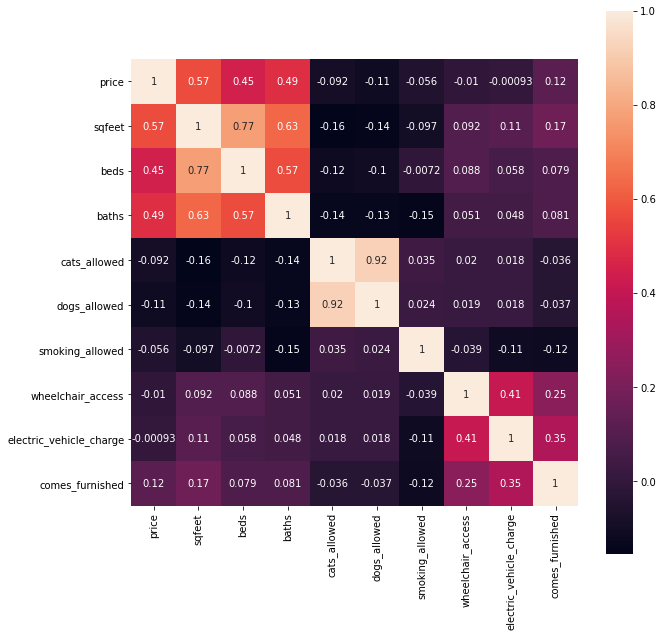

In [77]:
# Create heatmap for Lexington correlation matrix

fig, ax = plt.subplots(figsize=[10, 10])

sns.heatmap(lex_corr, ax=ax, annot=True, square=True)

Similar to both the Louisville data and the data for the country as a whole, all four cities have positive correlations between sqfeet, baths, and beds to the price of the house, in that order.

Let's look at a few scatterplots relating price to each of the three main columns we have chosen: sqfeet, baths, and beds. 

<AxesSubplot:xlabel='price', ylabel='sqfeet'>

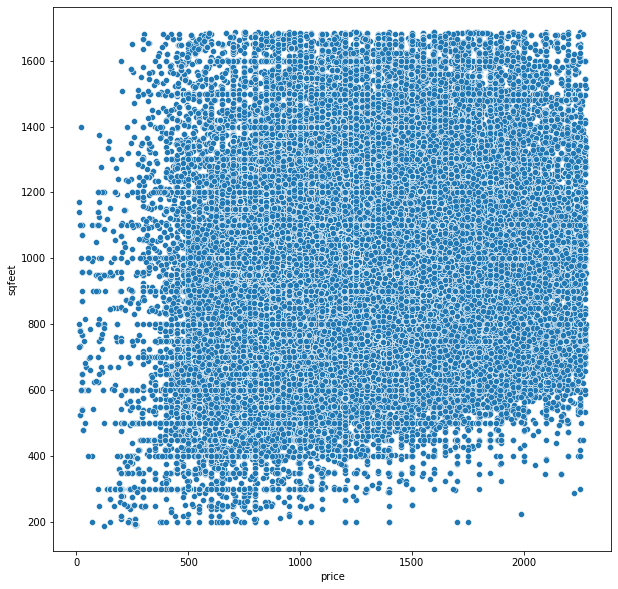

In [78]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_no_outliers)

That scatterplot has far too many data points to be usable. Let's get a random sample from the DataFrame.

Text(0.5, 1.0, 'Price vs Sqfeet (Sample of USA)')

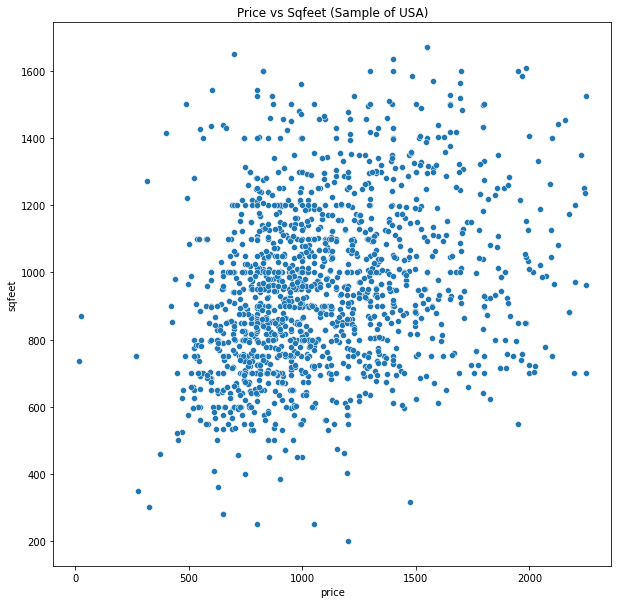

In [79]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_no_outliers.sample(n=1500, random_state=502)).set_title('Price vs Sqfeet (Sample of USA)')

It looks like a loose positive correlation that decreases as price and sqfeet increase. Let's look at a similar scatterplot for each city we are looking into.

Text(0.5, 1.0, 'Price vs Sqfeet (Sample of Louisville, KY)')

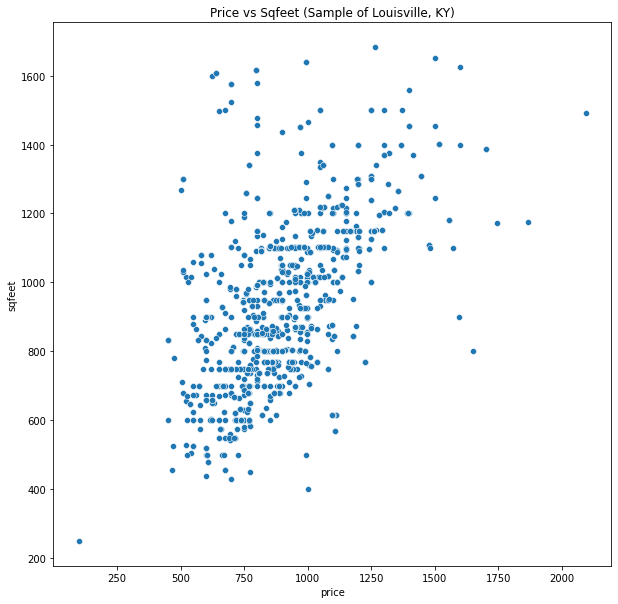

In [84]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_louisville).set_title('Price vs Sqfeet (Louisville, KY)')

Text(0.5, 1.0, 'Price vs Sqfeet (Sample of Louisville, KY)')

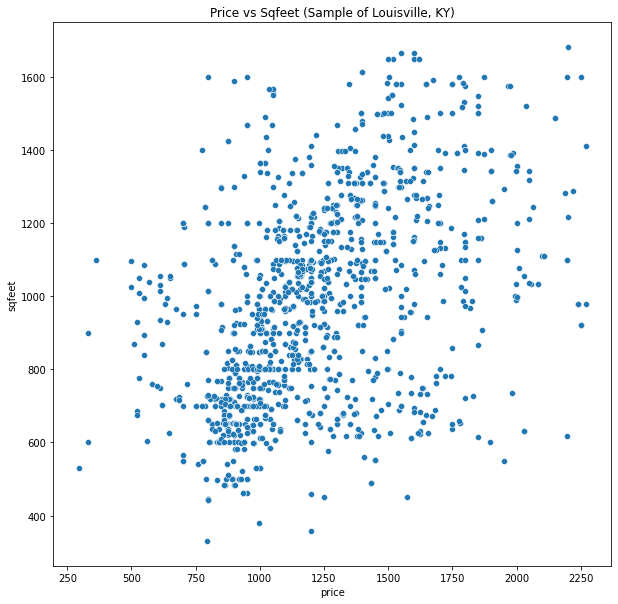

In [87]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_nashville).set_title('Price vs Sqfeet (Nashville, TN)')

Text(0.5, 1.0, 'Price vs Sqfeet (Cincinnati, OH)')

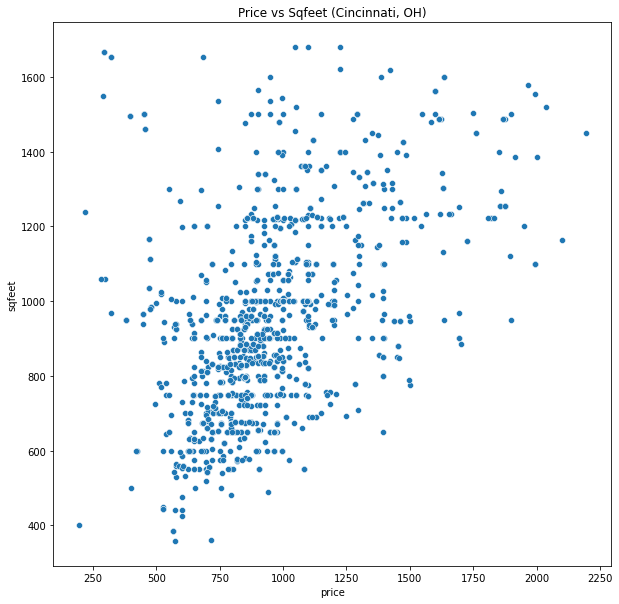

In [88]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_cincinnati).set_title('Price vs Sqfeet (Cincinnati, OH)')

Text(0.5, 1.0, 'Price vs Sqfeet (Indianapolis, IN)')

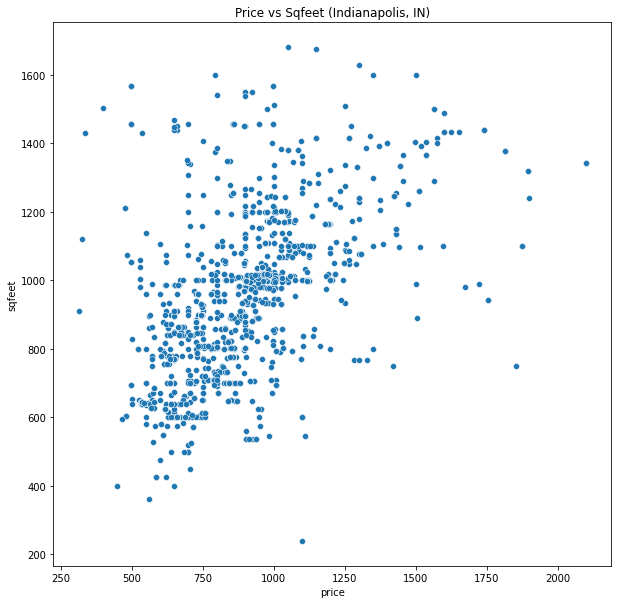

In [89]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_indianapolis).set_title('Price vs Sqfeet (Indianapolis, IN)')

Text(0.5, 1.0, 'Price vs Sqfeet (Lexington, KY)')

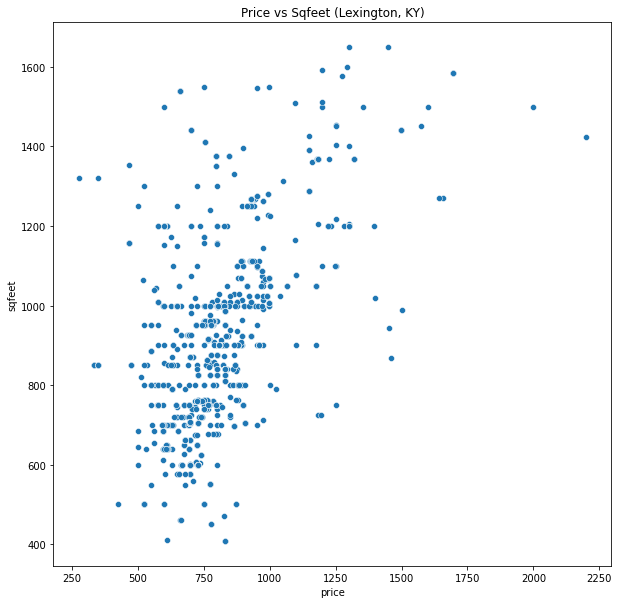

In [90]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.scatterplot(x='price', y='sqfeet', data=df_lexington).set_title('Price vs Sqfeet (Lexington, KY)')

Let's concatenate these individual DF's into one so we can compare each city side by side.

In [92]:
df_cities = pd.concat([df_louisville, df_nashville, df_cincinnati, df_indianapolis, df_lexington])

df_cities.sample(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
283389,nashville,875,apartment,638,1,1.0,1,1,1,0,0,0,36.2604,-86.7046,tn
123066,louisville,520,apartment,530,1,1.0,1,0,1,0,0,0,38.3089,-85.8221,ky
99832,indianapolis,1100,cottage/cabin,600,1,1.0,0,0,0,0,0,1,39.6020,-86.4190,in
226047,cincinnati,874,apartment,960,2,1.0,1,1,1,0,0,0,39.3385,-84.5371,oh
120018,lexington,729,apartment,600,1,1.0,1,1,1,0,0,0,38.0259,-84.5429,ky
99722,indianapolis,895,apartment,797,1,1.0,1,1,1,0,0,0,39.6405,-86.3118,in
281684,nashville,875,apartment,804,2,1.0,1,1,1,0,0,0,36.1379,-86.7410,tn
224795,cincinnati,640,house,795,3,2.0,1,1,1,0,0,0,39.1668,-84.5382,oh
224958,cincinnati,930,townhouse,1340,2,1.5,1,1,1,0,0,0,39.0225,-84.2175,oh
226219,cincinnati,769,apartment,620,1,1.0,1,1,1,0,0,0,39.3402,-84.3998,oh


Let's create some box plots comparing each city side by side.

<AxesSubplot:xlabel='region', ylabel='price'>

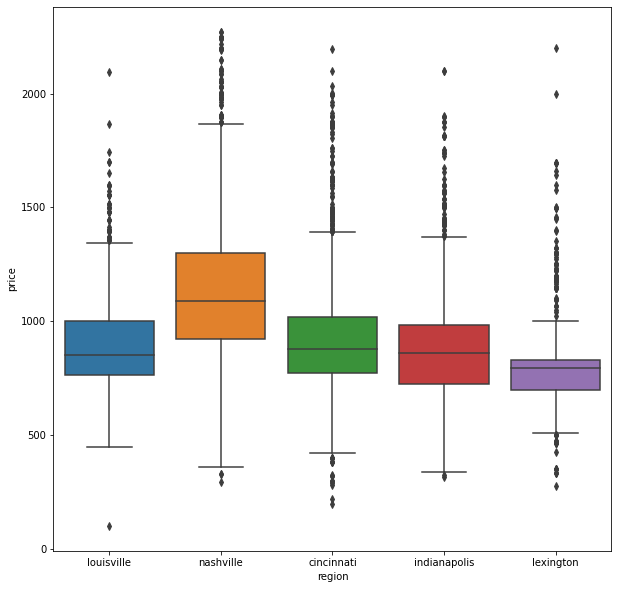

In [94]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.boxplot(y=df_cities.price, x=df_cities.region)

<AxesSubplot:xlabel='region', ylabel='sqfeet'>

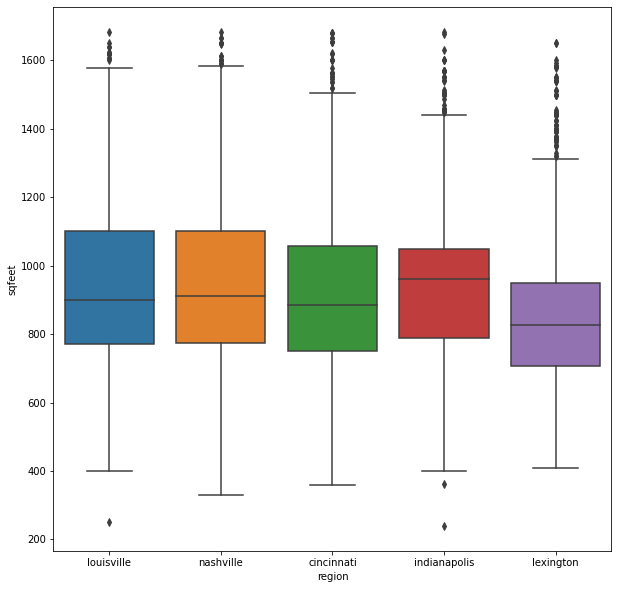

In [95]:
fig, ax = plt.subplots(figsize=[10, 10])

sns.boxplot(y=df_cities.sqfeet, x=df_cities.region)